# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/emelyzelaya/Downloads/Starter_Code 12/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/emelyzelaya/Downloads/Starter_Code 12/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Filter for initial timepoints 
initial_measurements = merged_data_df[merged_data_df['Timepoint'] == 0]

# Remove duplicate mice
initial_measurements = initial_measurements.drop_duplicates(subset='Mouse ID')

# Reset the index to get a continuous index starting from 0
initial_measurements.reset_index(drop=True, inplace=True)

# Display the data table for preview
initial_measurements.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
number_of_mice = merged_data_df['Mouse ID'].nunique()

print("Number of unique mice in the dataset:", number_of_mice)

Number of unique mice in the dataset: 249


In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

print("Mouse IDs with duplicate timepoints:")
print(duplicate_mouse_ids)

Mouse IDs with duplicate timepoints:
['g989']


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 

# Mouse ID for the duplicate data
duplicate_mouse_id = 'g989'

# Filter the merged DataFrame to get all data for the duplicate mouse ID
# Do not reset the index
duplicate_mouse_data = merged_data_df[merged_data_df['Mouse ID'] == duplicate_mouse_id]

# Display the data for the duplicate mouse
print("Data for the duplicate mouse ID (g989):")
duplicate_mouse_data

Data for the duplicate mouse ID (g989):


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Merge the data on 'Mouse ID'
merged_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Drop the duplicate mouse by ID
duplicate_mouse_id = 'g989'
cleaned_data_df = merged_data_df[merged_data_df['Mouse ID'] != duplicate_mouse_id]

# Filter for initial timepoints (timepoint 0)
initial_timepoint_data = cleaned_data_df[cleaned_data_df['Timepoint'] == 0]

# Reset the index
initial_timepoint_data.reset_index(drop=True, inplace=True)

# Display the data
initial_timepoint_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice in the clean DataFrame.

# Count the number of unique mice in the clean DataFrame
number_of_mice_clean = cleaned_data_df['Mouse ID'].nunique()

print("Number of unique mice in the clean DataFrame:", number_of_mice_clean)

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen'
grouped_df = cleaned_data_df.groupby('Drug Regimen')

# Calculate the statistics
mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_df['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_df['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

print("Summary Statistics Table:")
summary_statistics_df


Summary Statistics Table:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Using aggregation to produce summary statistics for each drug regimen
summary_stats_agg = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

print("Summary Statistics using Aggregation:")
summary_stats_agg


Summary Statistics using Aggregation:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

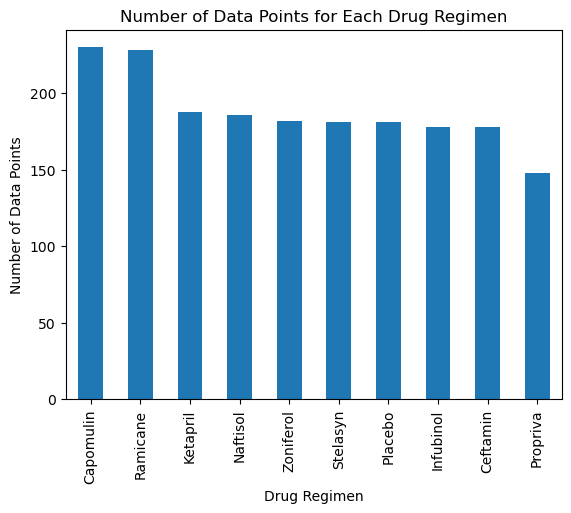

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of data points for each drug regimen
drug_regimen_counts = cleaned_data_df['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', title='Number of Data Points for Each Drug Regimen')

# Labeling axes
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Show the plot
plt.show()


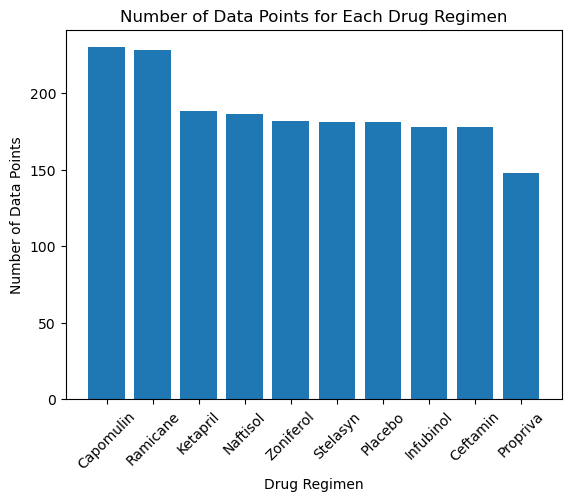

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of data points for each drug regimen
drug_regimen_counts = cleaned_data_df['Drug Regimen'].value_counts()

# Get the x-tick labels (drug regimen names) and their corresponding counts
x_labels = drug_regimen_counts.index
y_values = drug_regimen_counts.values

# Generate a bar plot using pyplot
plt.bar(x_labels, y_values)

# Labeling the axes and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Drug Regimen')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

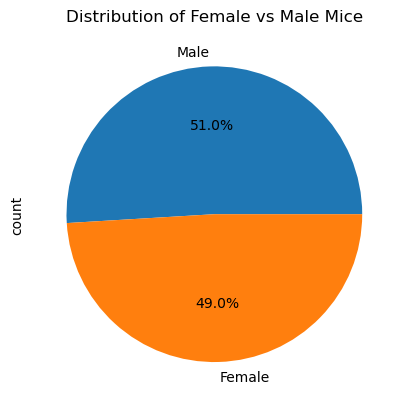

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of occurrences of each sex
sex_distribution = cleaned_data_df['Sex'].value_counts()

# Generate a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice')

# Show the plot
plt.show()

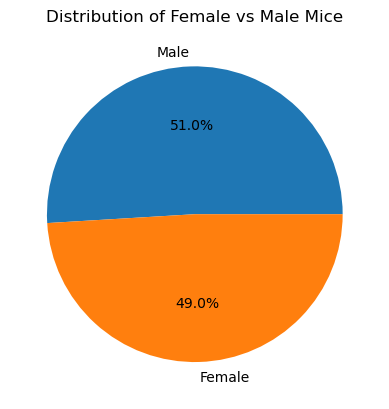

In [68]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sex
sex_distribution = cleaned_data_df['Sex'].value_counts()

# Extract labels and counts for the pie chart
labels = sex_distribution.index
sizes = sex_distribution.values

# Generate a pie plot using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# List of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data_df, on=['Mouse ID', 'Timepoint'], how='left')

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(final_tumor_volume)

    # Calculate IQR
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find potential outliers
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]

    print(f"Potential outliers for {treatment}: {outliers}")



Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


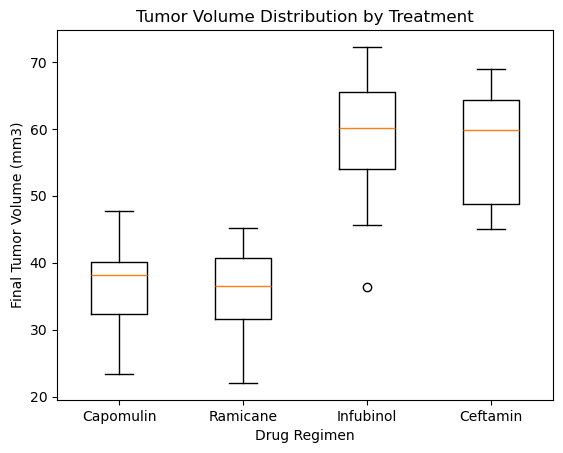

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Treatments list for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens
plt.boxplot(tumor_vol_data, labels=treatments)

# Add title and labels to the plot
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.show()


## Line and Scatter Plots

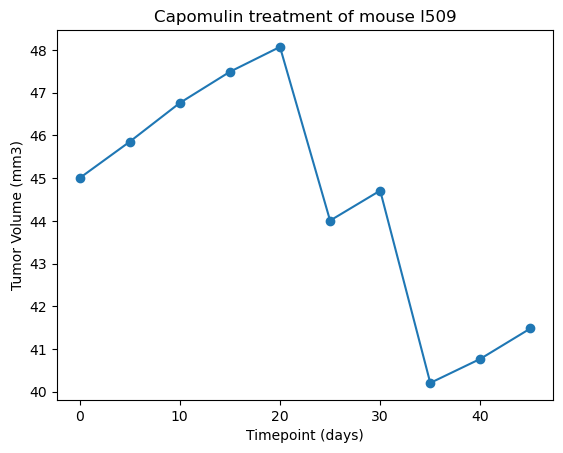

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin and the specific mouse ID 'l509'
capomulin_data = cleaned_data_df[(cleaned_data_df['Drug Regimen'] == 'Capomulin') & (cleaned_data_df['Mouse ID'] == 'l509')]

# Generate a line plot of tumor volume vs. time point for mouse l509 treated with Capomulin
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')

# Add title and labels to the plot
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


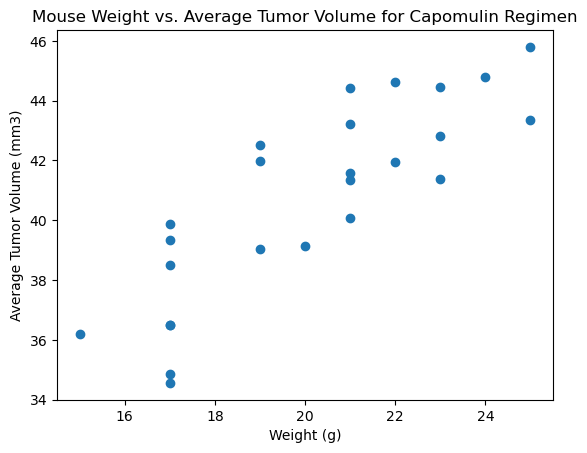

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'})

# Merge the average tumor volume with mouse weight data
avg_tumor_vol = avg_tumor_vol.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate the scatter plot
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Add title and labels to the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


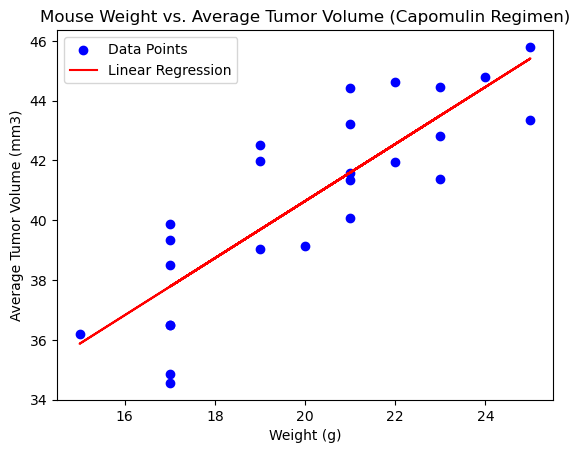

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = avg_tumor_vol['Weight (g)'].corr(avg_tumor_vol['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='blue', marker='o', label='Data Points')

# Create a regression line
regress_line = slope * avg_tumor_vol['Weight (g)'] + intercept

# Plot the regression line
plt.plot(avg_tumor_vol['Weight (g)'], regress_line, color='red', label='Linear Regression')

# Add labels and a legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()

# Show the plot
plt.show()



